In [2]:
!pip install pandas

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("sales.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


In [9]:
#Skewness
#Positive skewness= Unit Price, Unit Cost, Total Cost,Total Revenue, Total Profit
#Negative Skewness= Units Sold. 


In [10]:
df["Total Profit"].skew()

1.4053774730135409

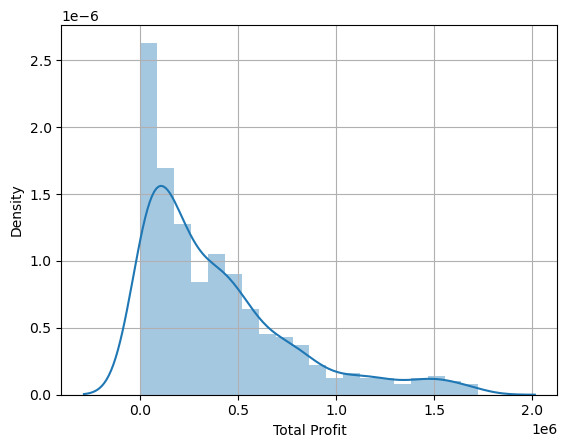

In [11]:
sns.distplot(df["Total Profit"])
plt.grid(True)

Total profit have the long tail on the right side which shows the positive skewness. 

In [12]:
df.drop(["Country","Order Date","Order ID","Ship Date"],axis=1,inplace=True)

In [13]:
df.head()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Cosmetics,Offline,M,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Vegetables,Online,M,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Baby Food,Offline,C,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Cereal,Offline,C,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Fruits,Offline,H,9845,9.33,6.92,91853.85,68127.40,23726.45


In [14]:
df.columns

Index(['Region', 'Item Type', 'Sales Channel', 'Order Priority', 'Units Sold',
       'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

In [15]:
df["Item Type"].value_counts()

Beverages          101
Vegetables          97
Office Supplies     89
Baby Food           87
Personal Care       87
Snacks              82
Cereal              79
Clothes             78
Meat                78
Household           77
Cosmetics           75
Fruits              70
Name: Item Type, dtype: int64

In [16]:
df["profit(%)"]=df["Total Profit"]/df["Total Profit"].sum()*100
df["profit(%)"]

0      0.375382
1      0.048703
2      0.037172
3      0.075229
4      0.006065
         ...   
995    0.091956
996    0.007057
997    0.154209
998    0.415212
999    0.079894
Name: profit(%), Length: 1000, dtype: float64

In [17]:
df

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,profit(%)
0,Middle East and North Africa,Cosmetics,Offline,M,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,0.375382
1,North America,Vegetables,Online,M,3018,154.06,90.93,464953.08,274426.74,190526.34,0.048703
2,Middle East and North Africa,Baby Food,Offline,C,1517,255.28,159.42,387259.76,241840.14,145419.62,0.037172
3,Asia,Cereal,Offline,C,3322,205.70,117.11,683335.40,389039.42,294295.98,0.075229
4,Sub-Saharan Africa,Fruits,Offline,H,9845,9.33,6.92,91853.85,68127.40,23726.45,0.006065
...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Snacks,Offline,C,6524,152.58,97.44,995431.92,635698.56,359733.36,0.091956
996,Europe,Baby Food,Offline,H,288,255.28,159.42,73520.64,45912.96,27607.68,0.007057
997,Middle East and North Africa,Vegetables,Online,C,9556,154.06,90.93,1472197.36,868927.08,603270.28,0.154209
998,Europe,Household,Offline,L,9801,668.27,502.54,6549714.27,4925394.54,1624319.73,0.415212


Calculate total profit and total cost and total revenue to understand the performance of each product category. 

<AxesSubplot:xlabel='Item Type'>

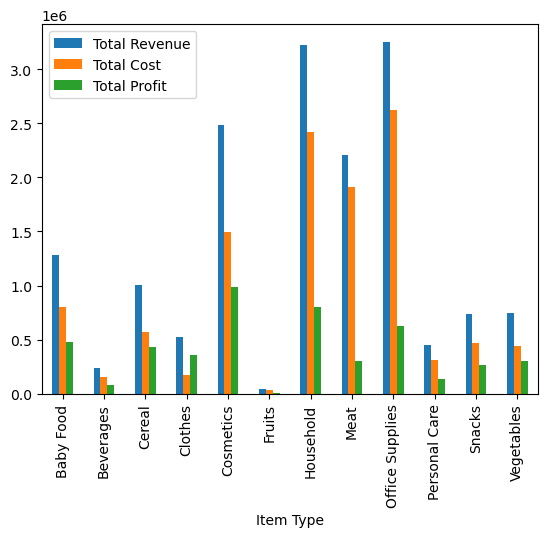

In [18]:
df.groupby("Item Type")[["Total Revenue","Total Cost","Total Profit"]].mean().plot(kind="bar")

Here from the above bars we can say that "Office supplier" have the highest revenue with the highiest cost.
but cosmatics holds the highest profit with the low cost as compare to "office supplier" and "households". 

In [19]:
df[df["Item Type"]=="Cosmetics"]["profit(%)"].sum()

18.936769962906535

cosmatics category is contributing 18.9367% of the total profit. 

In [20]:
df[df["Item Type"]=="Office Supplies"]["profit(%)"].sum()

14.344447312410987

Office supplies Category is contributing 14.34% of total profit. 

In [21]:
df[df["Item Type"]=="Household"]["profit(%)"].sum()

15.716792869765886

Household products category contributing 15.71% of the total profit. 

<AxesSubplot:xlabel='Item Type'>

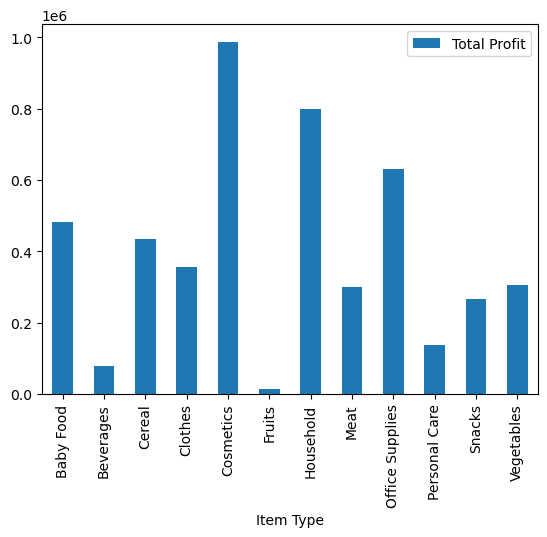

In [22]:
df.groupby("Item Type")[["Total Profit"]].mean().plot(kind="bar")

profit contribution from the each product category is as above. 
Cosmatics have the highest profits in the market. 

<AxesSubplot:xlabel='Sales Channel'>

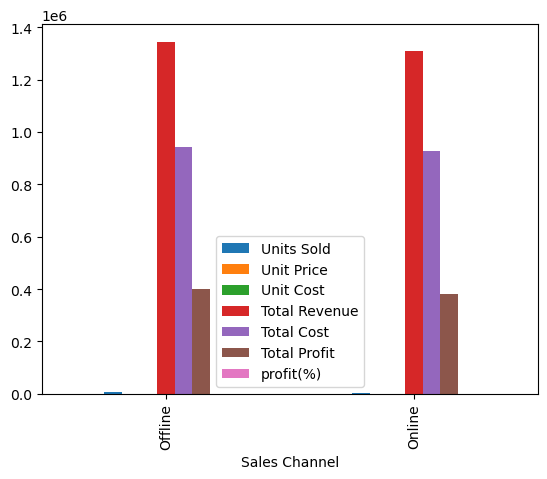

In [23]:
df.groupby("Sales Channel").mean().plot(kind="bar")

In [24]:
df[df["Sales Channel"]=="Offline"]["profit(%)"].sum()

53.14056462992597

In [25]:
df[df["Sales Channel"]=="Online"]["profit(%)"].sum()

46.859435370074046

offline sales have slightly beaten online sales. 
offline profits are slightly higher than online. 

<AxesSubplot:xlabel='Sales Channel'>

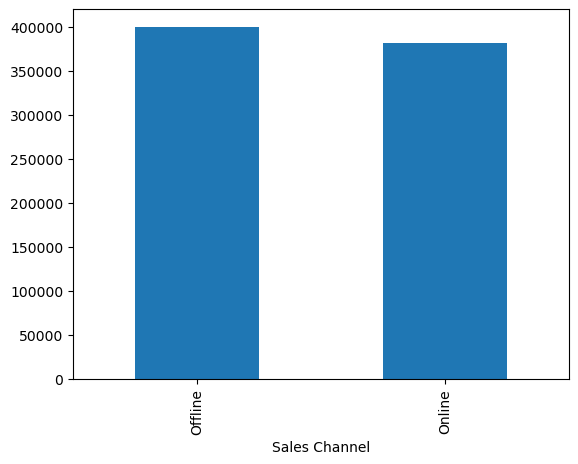

In [26]:
df.groupby("Sales Channel")["Total Profit"].mean().plot(kind="bar")

company have sold more products offline than online.
cost of offline selling is higher than the online.
but company have made more profits in offline mode.

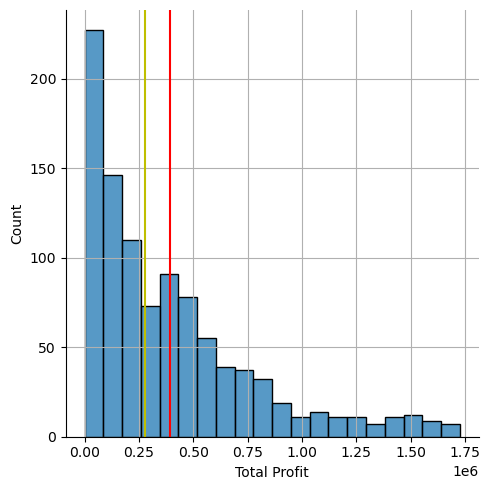

In [27]:
mprice=df["Total Profit"].mean()
meprice=df["Total Profit"].median()
sns.displot(df["Total Profit"])
plt.axvline(mprice,color="r")
plt.axvline(meprice,color="y")
plt.grid(True)
plt.show()

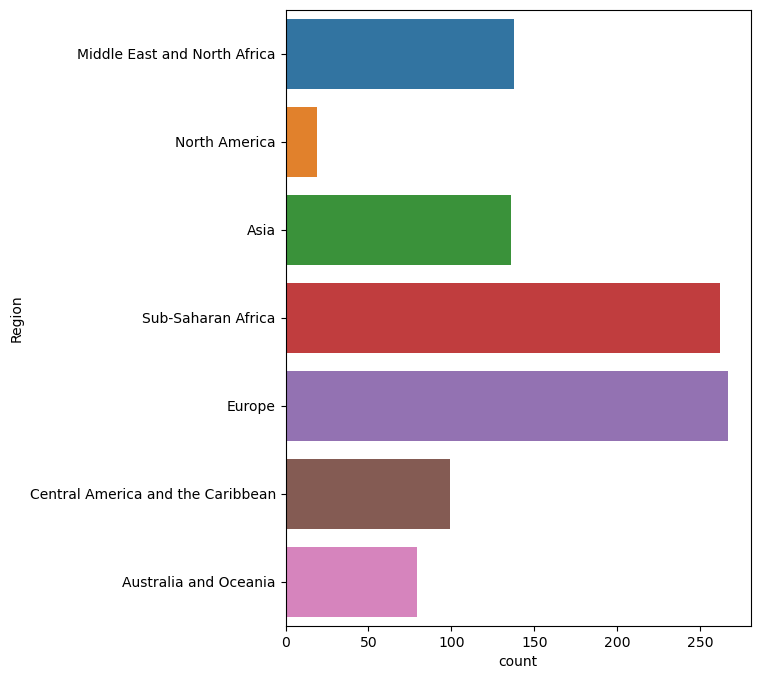

In [28]:
plt.figure(figsize=(6,8))
sns.countplot(data=df,y="Region")
plt.show()

sub-saharan africa and Europe these two are the main regions of sales which generates 52% of overall market sales.

<AxesSubplot:xlabel='Item Type'>

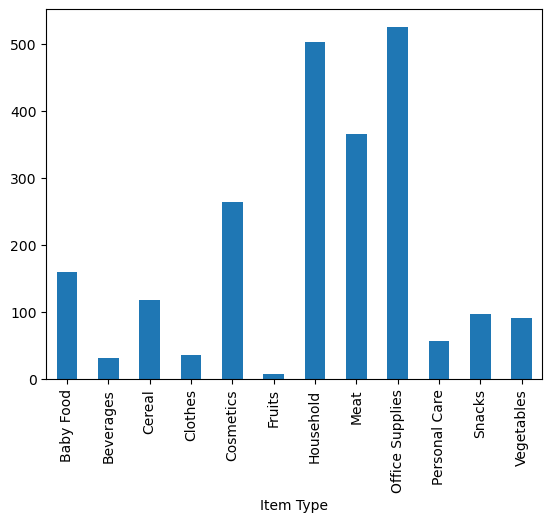

In [29]:
df.groupby("Item Type")["Unit Cost"].mean().plot(kind="bar")

Households and office supplies have the exepensive products as compare to other. and fruits and Beverages are the chepest ones among all. 

<AxesSubplot:xlabel='Item Type'>

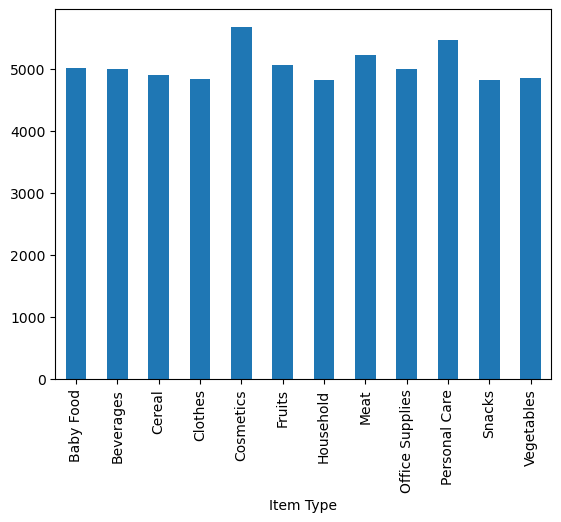

In [30]:
df.groupby("Item Type")["Units Sold"].mean().plot(kind="bar")

cosmetics is the leading product among all with the slightly high sales rate and profit. 

In [31]:
df.corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,profit(%)
Units Sold,1.000000,0.004212,0.002574,0.527945,0.479713,0.591957,0.591957
Unit Price,0.004212,1.000000,0.986735,0.730752,0.745538,0.572235,0.572235
Unit Cost,0.002574,0.986735,1.000000,0.717999,0.753678,0.498156,0.498156
Total Revenue,0.527945,0.730752,0.717999,1.000000,0.987779,0.881429,0.881429
Total Cost,0.479713,0.745538,0.753678,0.987779,1.000000,0.797041,0.797041
Total Profit,0.591957,0.572235,0.498156,0.881429,0.797041,1.000000,1.000000
profit(%),0.591957,0.572235,0.498156,0.881429,0.797041,1.000000,1.000000


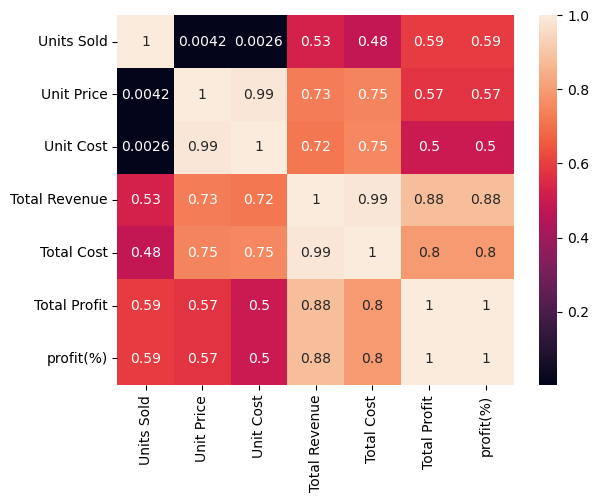

In [32]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

the color slider above shows the relation of diffrent aspects of the business. the lighter the color the more strong is the relation. for example Total profit and total revenue are highly positive co-related. 

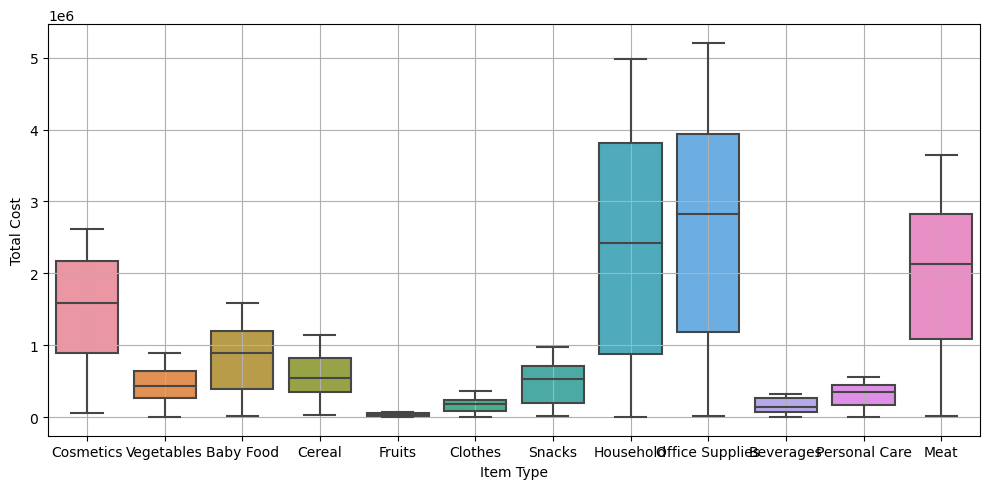

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="Item Type",y="Total Cost")
plt.tight_layout()
plt.grid(True)
plt.show()

sales cost of each category is as above. 
fruit have the lowest sales cost where office supplies and Households have the highest cost. 

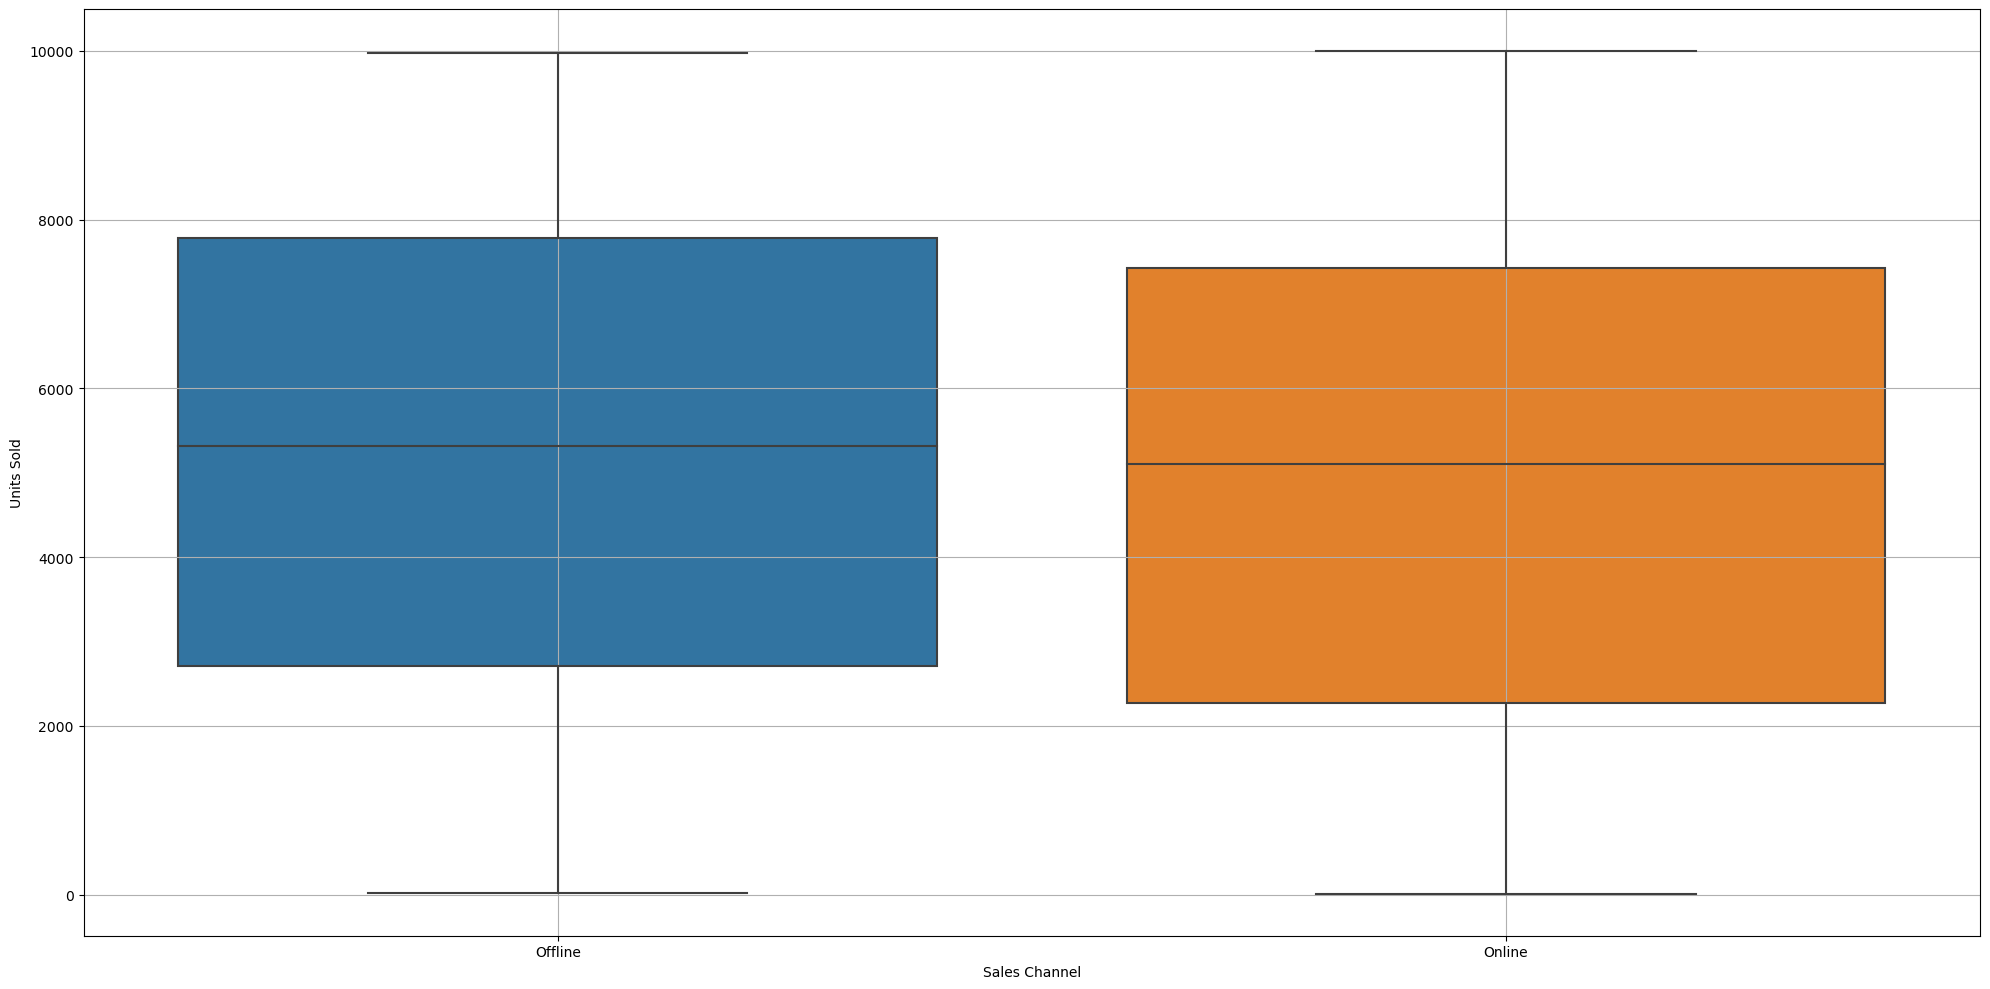

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="Sales Channel",y="Units Sold")
plt.tight_layout()
plt.grid(True)
plt.show()

Number of units sold in offline mode are slightly Higher than the online mode. 

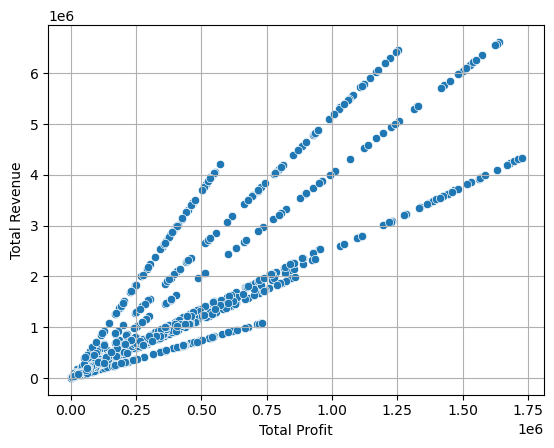

In [38]:
sns.scatterplot(data=df,x="Total Profit",y="Total Revenue")
plt.grid(True)
plt.show()

profit and revenue have the positive co-relation. as the revenue increases the profit will also increase (if the cost is constant)

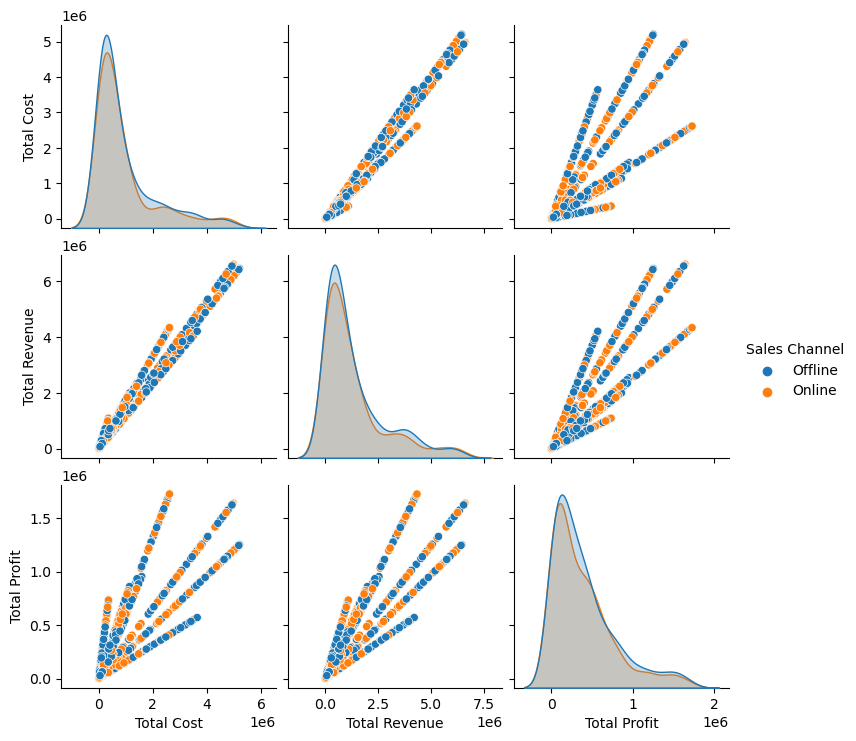

In [36]:
sns.pairplot(df[["Total Cost","Total Revenue","Total Profit","Sales Channel"]],hue="Sales Channel")
plt.show()

Final Conclusion
1. Company is doing great in offline market. as the sales and profits are slightly higher in offline mode
2. sub shara-africa and europ are the two major regions of sales which covers about 52% of oevrall sales.
3. company is doing great in cosmetics,houeholds and office supplies.
4. cosmetics is the most profitabe product among all and contributes 18.93% percentage of overall profit.
5. household and office supplies have the highest revenue but highest cost too which lead to low profit. reducing cost of production without quality compramize will help in increasing the profit.
6. company is making profit in all categories and from all the region. 
7. Cosmetics is the best category among all as it cost's less and have higher sales rate and the proft is also high among all. 
